In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)
x4 = np.random.rand(100)
noise = np.random.rand(100)
y = x1 + x2**2 + x3*x4

# Create a DataFrame
X_train = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'noise': noise})

In [3]:
target_train = pd.Series(x1 + x2**2 + x3*x4)
target_train.name = 'y'

In [4]:
# Replace DecisionTreeRegressor with RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=100)
forest_model.fit(X=X_train, y=target_train)

RandomForestRegressor(criterion='absolute_error', max_depth=2, random_state=100)

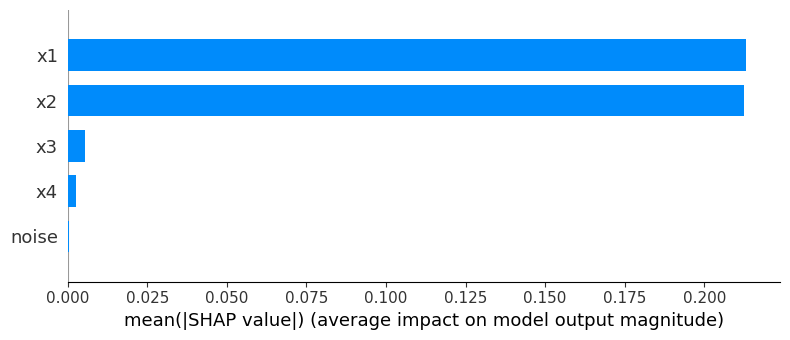

In [5]:
# Using SHAP with RandomForestRegressor
explainer = shap.TreeExplainer(forest_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

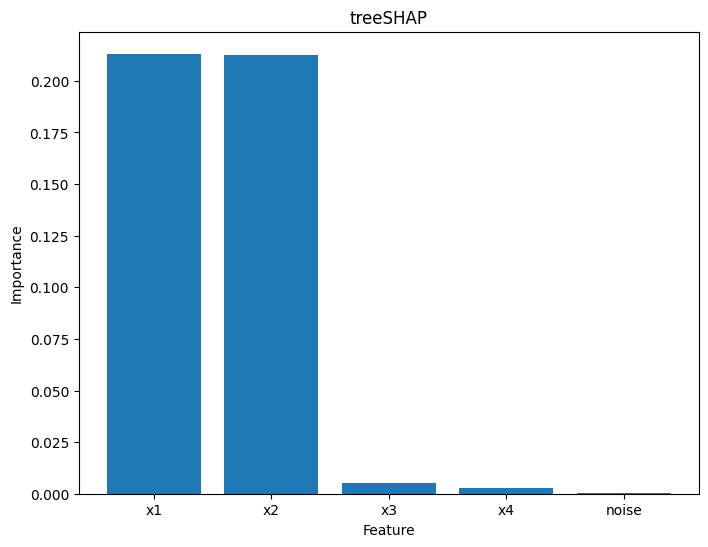

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(X_train.columns[:], np.mean(np.abs(shap_values), axis=0))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("treeSHAP")
plt.savefig("figs/treeSHAP.png", format='png')
plt.show()